---

# <center> ★ AI / ML Project - User-Movie Recommendation System ★
#### <center> ***Domain: Entertainment***

---

<img src="mv.jpg" style="width: 500px;"/>

---

### Description:

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files links.csv, movies.csv, ratings.csv and tags.csv. More details about the contents and use of all these files follows.

This is a development dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available benchmark datasets if that is your intent.


### Acknowledgements:
This dataset is taken from Kaggle, \
https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to recommend a movie based on users ratings.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Data Pre-processing
3. Exploratory Data Analysis (EDA)
4. Data Manipulation
5. Predictive Modelling
6. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [55]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from scipy.sparse import csr_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [86]:
#Importing the dataset

movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")

#original_df = df.copy(deep=True)

display(ratings_df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(ratings_df.shape[1], ratings_df.shape[0]))

display(movies_df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(movies_df.shape[1], movies_df.shape[0]))

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



Inference: The Datset consists of 4 features & 100836 samples.


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



Inference: The Datset consists of 3 features & 9742 samples.


In [57]:
#Checking the dtypes of all the columns

print(ratings_df.info())
print()
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [58]:
#Checking number of unique rows in each feature

print(ratings_df.nunique())
print()
print(movies_df.nunique())

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

movieId    9742
title      9737
genres      951
dtype: int64


In [59]:
#Checking the stats of all the columns

display(df.describe())

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
count,232.000000,29.000000,39.000000,216.000000,44.000000,314.000000,152.000000,47.000000,46.000000,140.000000,...,101.000000,135.000000,943.000000,100.000000,221.000000,1115.000000,187.000000,831.000000,37.000000,1302.000000
mean,4.366379,3.948276,2.435897,3.555556,3.636364,3.493631,3.230263,3.574468,3.260870,3.278571,...,4.425743,3.392593,3.507953,3.480000,3.210407,3.657399,3.786096,3.134176,3.270270,3.688556
std,0.800048,0.805615,2.090642,1.314204,0.990441,0.850648,1.329594,0.972328,1.272526,1.175700,...,0.454896,0.978091,1.153638,0.745085,0.818719,0.724121,0.965657,1.079262,0.450225,0.857422
min,1.000000,2.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000,...,3.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.500000,3.000000,0.500000
25%,4.000000,3.500000,0.500000,3.000000,3.000000,3.000000,2.000000,3.000000,2.250000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.500000,3.000000,2.500000,3.000000,3.000000
50%,5.000000,4.000000,0.500000,4.000000,4.000000,3.000000,3.500000,3.000000,3.000000,3.500000,...,4.500000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.500000
75%,5.000000,4.500000,4.750000,5.000000,4.000000,4.000000,4.500000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,3.500000,4.000000,5.000000,4.000000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Data Preprocessing

In [60]:
#Check for empty elements

print(ratings_df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

print(movies_df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Inference: The dataset doesn't have any null elements
movieId    0
title      0
genres     0
dtype: int64

Inference: The dataset doesn't have any null elements


In [61]:
# Removal of any Duplicate rows (if any)

counter = 0
r,c = movies_df.shape

df1 = movies_df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')
    
counter = 0
r,c = ratings_df.shape

df1 = ratings_df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')
    


Inference: The dataset doesn't have any duplicates

Inference: The dataset doesn't have any duplicates


In [62]:
#Removal of outlier:

df2 = ratings_df.copy()

for i in df2.columns:
    if df2[i].nunique()>=12:
        Q1 = df2[i].quantile(0.15)
        Q3 = df2[i].quantile(0.85)
        IQR = Q3 - Q1
        df2 = df2[df2[i] <= (Q3+(1.5*IQR))]
        df2 = df2[df2[i] >= (Q1-(1.5*IQR))]
df2 = df2.reset_index(drop=True)
display(df2.head())

ratings_df = df2.copy()
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df2.shape[1], df2.shape[0]))

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



Inference: After removal of outliers, The dataset now has 4 features & 99104 samples.


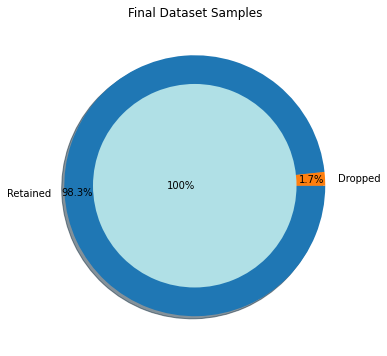


Inference:The final dataset after cleanup has 9724 samples & 610 rows.


In [65]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df1.shape[0], df1.shape[0]-ratings_df.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

In [68]:
#Final Dataset

final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.fillna(0, inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


---

## <center> 2. Exploratory Data Analysis (EDA)

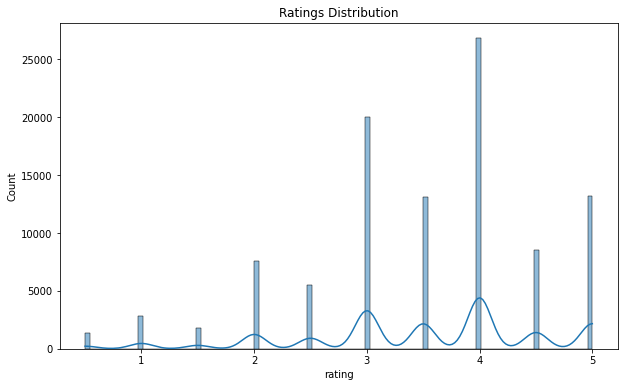

In [33]:
#Let us first analyze the ratings distribution

sns.histplot(ratings_df.rating, kde=True)
plt.title('Ratings Distribution')
plt.show()

**Inference:** The median of the majority votes seem to be at 3.5, while small number of votes are offered for 0.5 & 1...

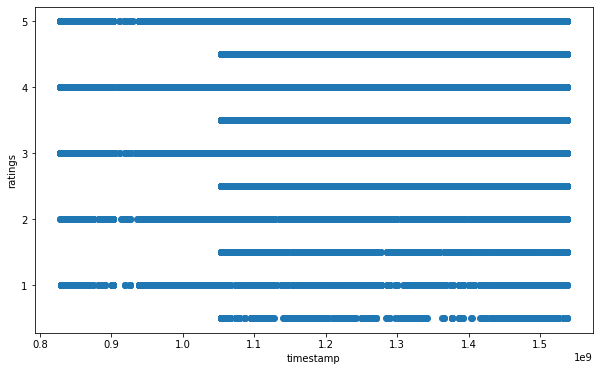

In [30]:
#Visualising the categorical features 

plt.scatter(ratings_df.timestamp, ratings_df.rating)
plt.xlabel('timestamp')
plt.ylabel('ratings')
plt.show()

**Inference:** It seems that the decimal ratings were introduced later in the timestamp range of 1.05e9.

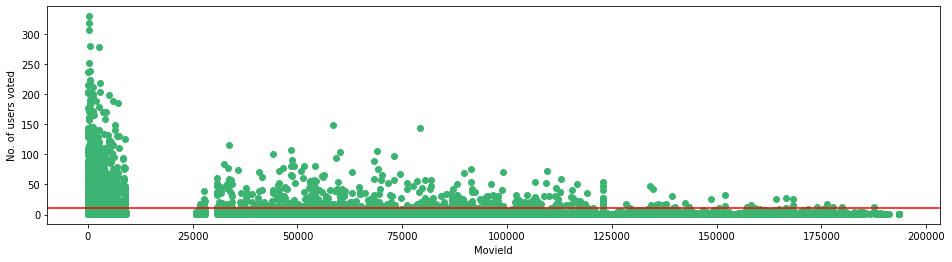

In [70]:
#Visualising number of users who voted with threshold of 10

no_user_voted = ratings.groupby('movieId')['rating'].agg('count')

f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

**Inference:** It seems that the number of user votings for respective movies vary alot, hence we shall try to filter these with an optimal threshold that would cover most of the datapoints.

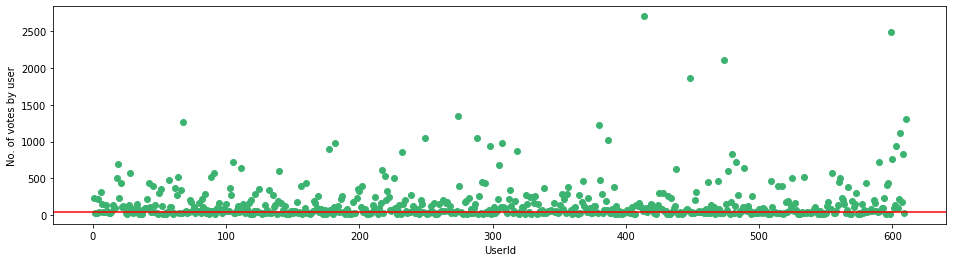

In [71]:
# Visualising the number of votes by each user with threshold of 50

no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

**Inference:** The number of votings by each users also seem to vary alot, hence we shall try to filter these with an optimal threshold that would cover most of the datapoints.

---

## <center> 4. Data Manipulation

In [72]:
#Filtering the thresholds for the given datapoints

final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Inference:** The final dataset seems to be sparse. Let us try to fix it...

In [73]:
# CSR Matrix Representation

csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

---

## <center> 5. Predictive Modeling

## K-Nearest Neighbours Classfier:

In [83]:
# Building Neareset Neighbours Classifier with Cosine distance measure

knn = NearestNeighbors(metric="cosine",algorithm='brute', n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [81]:
#Defining a function to get the movie recommendations

def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [84]:
#Let us now get movie Recommendations

get_movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [85]:
get_movie_recommendation('Memento')

,Title,Distance
1,American Beauty (1999),0.389346
2,American History X (1998),0.388615
3,Pulp Fiction (1994),0.386235
4,"Lord of the Rings: The Return of the King, The...",0.371622
5,Kill Bill: Vol. 1 (2003),0.350167
6,"Lord of the Rings: The Two Towers, The (2002)",0.348358
7,Eternal Sunshine of the Spotless Mind (2004),0.346196
8,"Matrix, The (1999)",0.326215
9,"Lord of the Rings: The Fellowship of the Ring,...",0.316777
10,Fight Club (1999),0.272380


---

## <center> 6. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 9724 unique movies and 1M ratings. After preprocessing 1.7% of the datasamples were dropped. 
- There were also few outliers & no duplicates present in the datset, which had to be dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Further filtering was done with threshold for the number of ratings per user & per movie.
- The filtered data was was quiet spare, hence it was represented with the help of CSR Matrix Representaion.
- Finally Nearest Neighbours Algorithm was employed to get the similar Movie Recommendations based on the Cosine Similarity.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>